# Traffic Police Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [2]:
df = pd.read_csv('police.csv')

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(91741, 15)

In [5]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [7]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

### Convert stop_date and stop_time into date and time

In [8]:
df['stop_time'] = pd.to_datetime(df.stop_time)
df['stop_date'] = pd.to_datetime(df.stop_date)

In [9]:
df.dtypes

stop_date             datetime64[ns]
stop_time             datetime64[ns]
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

### Search_conducted for each age group for male and female

In [10]:
pd.pivot_table(df, index = ['driver_gender', 'violation'])

driver_age  driver_age_raw  \
driver_gender violation                                         
F             Equipment             31.521739     1978.642397   
              Moving violation      33.954930     1972.106117   
              Other                 33.969343     1962.591304   
              Registration/plates   32.850791     1976.183613   
              Seat belt             30.124409     1983.960630   
              Speeding              32.529023     1974.767666   
M             Equipment             31.857210     1977.442517   
              Moving violation      36.653404     1966.953994   
              Other                 40.620631     1912.469810   
              Registration/plates   32.783023     1975.455974   
              Seat belt             32.776867     1981.343116   
              Speeding              34.000729     1972.413384   

                                   drugs_related_stop  search_conducted  
driver_gender violation                                                  
F             Equipment                      0.008042          0.042622  
              Moving violation               0.009363          0.036205  
              Other                          0.010145          0.056522  
              Registration/plates            0.003949          0.066140  
              Seat belt                      0.006299          0.012598  
              Speeding                       0.002002          0.008720  
M             Equipment                      0.022852          0.070081  
              Moving violation               0.016974          0.059831  
              Other                          0.005514          0.047146  
              Registration/plates            0.016122          0.110376  
              Seat belt                      0.017264          0.037980  
              Speeding                       0.006186          0.024925

### Min, max, avg age of male and female --- for each violation and what times

In [11]:
pd.pivot_table(df, index = ['driver_gender', 'violation'], values = ['driver_age'], aggfunc=[np.mean,np.max,np.min, len])

mean       amax       amin        len
                                  driver_age driver_age driver_age driver_age
driver_gender violation                                                      
F             Equipment            31.521739       89.0       16.0       2487
              Moving violation     33.954930       99.0       15.0       3204
              Other                33.969343       74.0       16.0        690
              Registration/plates  32.850791       72.0       16.0       1013
              Seat belt            30.124409       71.0       17.0        635
              Speeding             32.529023       84.0       16.0      15482
M             Equipment            31.857210       85.0       16.0       8533
              Moving violation     36.653404       94.0       15.0      13020
              Other                40.620631       87.0       16.0       3627
              Registration/plates  32.783023       74.0       16.0       2419
              Seat belt            32.776867       77.0       17.0       2317
              Speeding             34.000729       90.0       15.0      32979

### How many people are arrested on each date

In [12]:
df.groupby('stop_date').is_arrested.value_counts()

stop_date   is_arrested
2005-01-02  False           1
2005-01-18  False           1
2005-01-23  False           1
2005-02-20  True            1
2005-03-14  False           1
                           ..
2015-12-28  False          20
2015-12-29  False          12
2015-12-30  False          21
            True            1
2015-12-31  False          24
Name: is_arrested, Length: 5681, dtype: int64

### On which time police is more active??

In [13]:
df['stop_time'].mean()

Timestamp('2022-11-15 12:08:17.488364032')

In [14]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,2022-11-15 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,2022-11-15 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,2022-11-15 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,2022-11-15 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,2022-11-15 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### How many male and female drivers 

In [15]:
df['driver_gender'].value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

<AxesSubplot:>

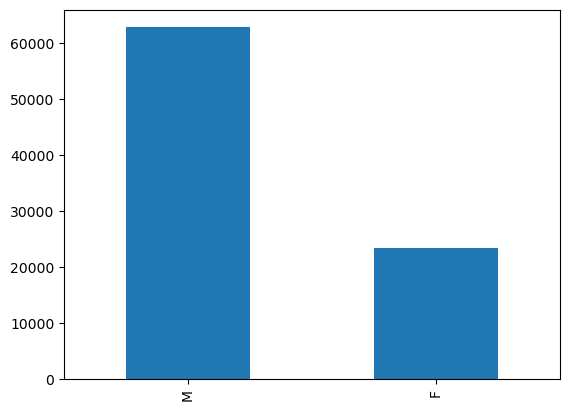

In [16]:
df['driver_gender'].value_counts().plot.bar()

### Find the average, min and max age for male and female drivers

In [17]:
df.groupby('driver_gender').driver_age.agg(['min', 'max', 'mean'])

,min,max,mean
driver_gender,,,
F,15.0,99.0,32.607399
M,15.0,94.0,34.537886


### Check drug activity

In [18]:
drug_data = df.groupby('driver_gender').drugs_related_stop.value_counts()
drug_data

driver_gender  drugs_related_stop
F              False                 23415
               True                     96
M              False                 62176
               True                    719
Name: drugs_related_stop, dtype: int64

#### Extract true cases for male and female 

In [19]:
df.groupby('driver_gender').drugs_related_stop.sum()

driver_gender
F     96
M    719
Name: drugs_related_stop, dtype: int64

#### Total cases for true and false for drugs 

In [20]:
df['drugs_related_stop'].value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

### What type of action is taken by police for each date

In [21]:
df.groupby('stop_date').stop_outcome.value_counts()

stop_date   stop_outcome    
2005-01-02  Citation             1
2005-01-18  Citation             1
2005-01-23  Citation             1
2005-02-20  Arrest Driver        1
2005-03-14  Citation             1
                                ..
2015-12-30  N/D                  2
            Arrest Passenger     1
2015-12-31  Citation            16
            Warning              7
            No Action            1
Name: stop_outcome, Length: 8970, dtype: int64

### How many times police has given warning as stop_outcome

In [22]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,2022-11-15 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,2022-11-15 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,2022-11-15 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,2022-11-15 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,2022-11-15 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [23]:
df['stop_outcome'].value_counts()

Citation            77006
Warning              5294
Arrest Driver        2571
N/D                   590
No Action             589
Arrest Passenger      358
Name: stop_outcome, dtype: int64

In [24]:
warning_data = df[df['stop_outcome'] == 'Warning']
warning_data

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
99,2005-10-03,2022-11-15 08:37:00,NaN,M,1965.0,40.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
108,2005-10-03,2022-11-15 17:00:00,NaN,M,1961.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,30+ Min,False
168,2005-10-06,2022-11-15 06:30:00,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
260,2005-10-09,2022-11-15 16:00:00,NaN,F,1978.0,27.0,Black,Registration Violation,Registration/plates,False,NaN,Warning,False,0-15 Min,False
281,2005-10-10,2022-11-15 12:05:00,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91730,2015-12-31,2022-11-15 15:36:00,NaN,F,1996.0,19.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91732,2015-12-31,2022-11-15 19:44:00,NaN,F,1969.0,46.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91736,2015-12-31,2022-11-15 20:27:00,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,2022-11-15 20:35:00,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False


In [25]:
len(warning_data)

5294

#### Warning cases for male and female

In [26]:
warning_data['driver_gender'].value_counts()

M    3779
F    1514
Name: driver_gender, dtype: int64

In [27]:
# another process 

warning_data.groupby('driver_gender').stop_outcome.value_counts()

driver_gender  stop_outcome
F              Warning         1514
M              Warning         3779
Name: stop_outcome, dtype: int64

### How many male and female for each violation 

In [28]:
df.groupby('driver_gender').violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

In [29]:
# another process

pd.crosstab(df['driver_gender'], df['violation'], margins = True)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
driver_gender,,,,,,,
F,2487,3204,690,1013,635,15482,23511
M,8533,13020,3627,2419,2317,32979,62895
All,11020,16224,4317,3432,2952,48461,86406


### Data distribution for driver age

<AxesSubplot:>

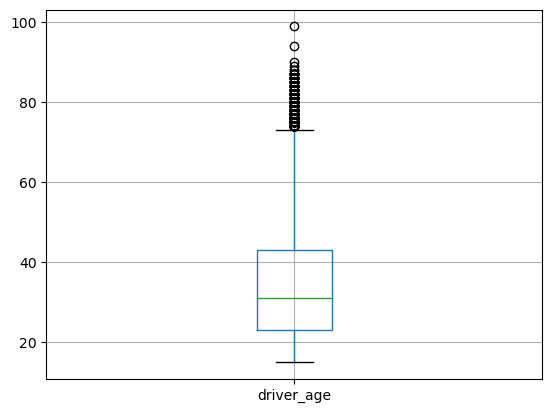

In [30]:
df.boxplot('driver_age')